#"Рекламщики" кейс


## Синий уровень

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/advertisment.csv')

#Создаем датасеты групп рекламных компаний
group_A = df[df['A']==1]
group_B = df[df['B']==1]

#Считаем количество
count_A=len(group_A['A'])
count_B=len(group_B['B'])
count_all = len(df['Age'])

#Вывод
print(count_A,count_B,count_all)


300 500 20000


In [52]:
#Создаем датасет не учавствовавших в рекламных компаниях
not_participant = df[(df['A'] != 1) & (df['B']!=1)]

#Считаем доли(конверсии)
natural_conversio = not_participant['Purchased'].sum()/len(not_participant['Age'])
all_conversio = df['Purchased'].sum()/len(df['Age'])
A_conversio = group_A['Purchased'].sum()/len(group_A['Age'])
B_conversio = group_B['Purchased'].sum()/len(group_B['Age'])

#Вывод

print('Количество среди всех: ',df['Purchased'].sum())
print('Количество среди невидивших рекламу: ',not_participant['Purchased'].sum())
print('Количество в группе А: ',group_A['Purchased'].sum())
print('Количество в группе В: ',group_B['Purchased'].sum())



print(f'Конверсия в контрольной группе: {all_conversio}')
print(f'Естественная конверсия: {natural_conversio}')
print(f'Конверсия в группе А: {A_conversio}')
print(f'Конверсия в группе В: {B_conversio}')

Количество среди всех:  1327.0
Количество среди невидивших рекламу:  1228.0
Количество в группе А:  33.0
Количество в группе В:  66.0
Конверсия в контрольной группе: 0.06635
Естественная конверсия: 0.06395833333333334
Конверсия в группе А: 0.11
Конверсия в группе В: 0.132


In [53]:
print(f'Прогноз доп покупок Сценарий №1(A): {(A_conversio - natural_conversio)*19200}')
print(f'Прогноз доп покупок Сценарий №2(B): {(B_conversio - natural_conversio)*19200}')

Прогноз доп покупок Сценарий №1(A): 883.9999999999999
Прогноз доп покупок Сценарий №2(B): 1306.4


##Красный уровень

In [55]:

print('РК А')
print('Доход: ', (A_conversio - natural_conversio)*19200*3000)
print('Расход: ', (A_conversio - natural_conversio)*19200*80)
print('Прибыль: ', (A_conversio - natural_conversio)*19200*2920)

print('РК В')
print('Доход: ', (B_conversio - natural_conversio)*19200*3000)
print('Расход: ', (B_conversio - natural_conversio)*19200*80)
print('Прибыль: ', (B_conversio - natural_conversio)*19200*2920)

РК А
Доход:  2651999.9999999995
Расход:  70719.99999999999
Прибыль:  2581279.9999999995
РК В
Доход:  3919200.0000000005
Расход:  104512.0
Прибыль:  3814688.0000000005


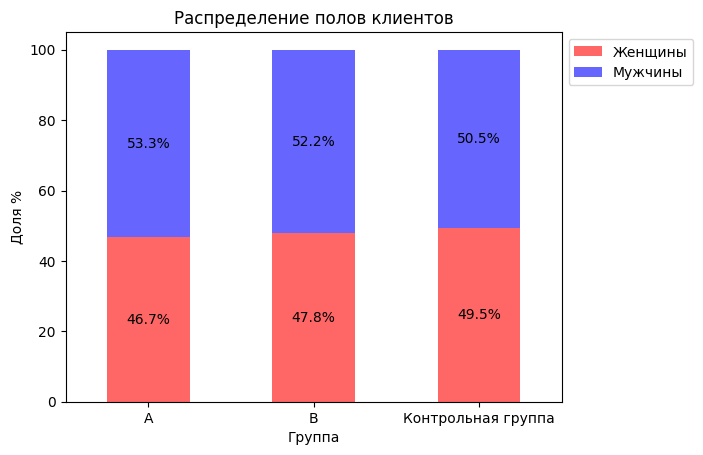

In [5]:
df_2 = df
df_2['group'] = df.apply(lambda row: 'A' if pd.notnull(row['A']) else ('B' if pd.notnull(row['B']) else 'Контрольная группа'), axis=1)
table_3 = pd.pivot_table(df_2,values='Age',index='group',columns='Gender', aggfunc='count')
grouped_data_percent_3 = table_3.div(table_3.sum(axis=1), axis=0) * 100


ax = grouped_data_percent_3.plot(kind='bar',color = ['red','blue'], stacked=True,alpha = 0.6)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')
plt.legend(['Женщины','Мужчины' ],loc="upper left",
bbox_to_anchor=(1,1))
plt.title('Распределение полов клиентов')
plt.xticks(rotation=0)
plt.xlabel('Группа')
plt.ylabel('Доля %')
plt.show()

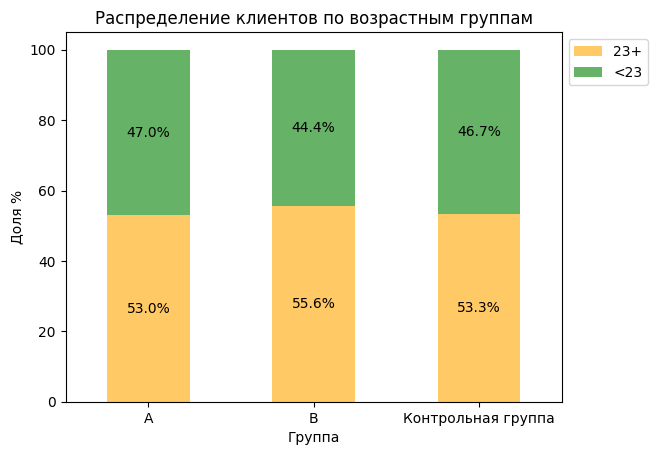

In [71]:

def categorize_age(age):
  if age<=22:
    return '<23'
  elif 23<=age:
    return '23+'

df_2 = df

df_2['AgeGroup'] = df_2['Age'].apply(lambda x: categorize_age(x))

table_4 = pd.pivot_table(df_2,values='Age',index=['group'],columns='AgeGroup', aggfunc='count')
#table_4_1 = table_4[table_4['AgeGroup']=='<23']
#table_4_2 = table_4[table_4['AgeGroup']=='<\23']
table_4.transpose()


grouped_data_percent = table_4.div(table_4.sum(axis=1), axis=0) * 100

ax = grouped_data_percent.plot(kind='bar',color = ['orange','green'], stacked=True,alpha = 0.6)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.title('Распределение клиентов по возрастным группам')
plt.legend(loc="upper left",
bbox_to_anchor=(1,1))
plt.xticks(rotation=0)
plt.xlabel('Группа')
plt.ylabel('Доля %')
plt.show()

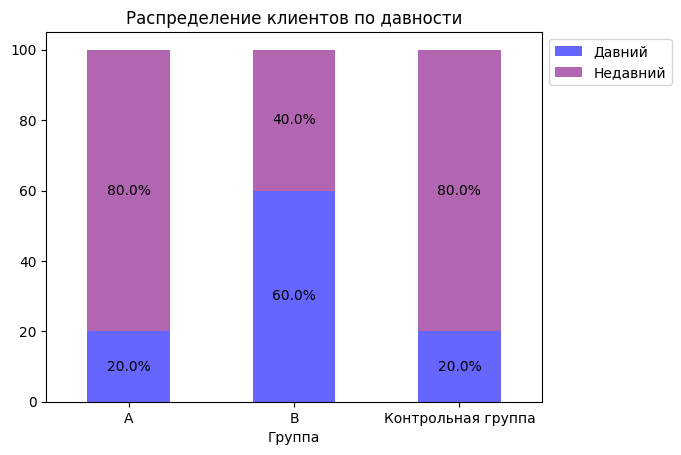

In [70]:
def categorize_Exp(year):
  if year == 2023:
    return 'Давний'
  elif year == 2024:
    return 'Недавний'

df_2['Exp'] = df_2['ClientSince'].apply(lambda x: categorize_Exp(x))

table_2 = pd.pivot_table(df_2,values='Age',index=['group'],columns='Exp', aggfunc='count')
grouped_data_percent_2 = table_2.div(table_2.sum(axis=1), axis=0) * 100

ax = grouped_data_percent_2.plot(kind='bar',color = ['blue','purple'], stacked=True,alpha = 0.6)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.title('Распределение клиентов по давности')
plt.legend(loc="upper left",
bbox_to_anchor=(1,1))
plt.xticks(rotation=0)
plt.xlabel('Группа')
plt.show()


##Черный уровень

###**Графики**

####Естественные конверсии

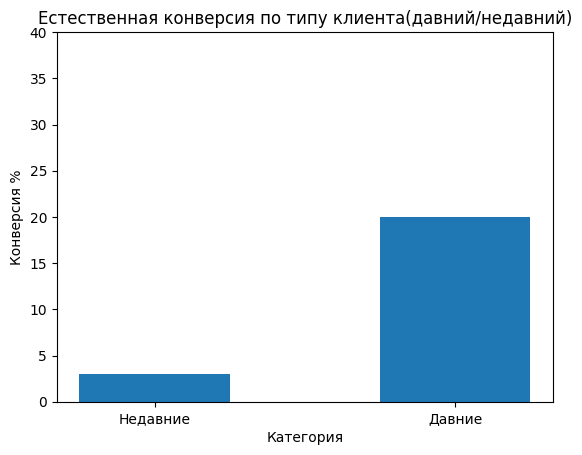

In [82]:

nat_conv_old = not_participant[not_participant['ClientSince']==2023]['Purchased'].sum()/len(not_participant[not_participant['ClientSince']==2023])
nat_conv_new = not_participant[not_participant['ClientSince']==2024]['Purchased'].sum()/len(not_participant[not_participant['ClientSince']==2024])

values_conv = [nat_conv_new*100,nat_conv_old*100]

categories = ['Недавние', 'Давние']

plt.bar(categories, values_conv,width=0.5)


plt.xlabel('Категория')
plt.ylabel('Конверсия %')

plt.title('Естественная конверсия по типу клиента(давний/недавний)')

plt.ylim(0, 40)



plt.show()


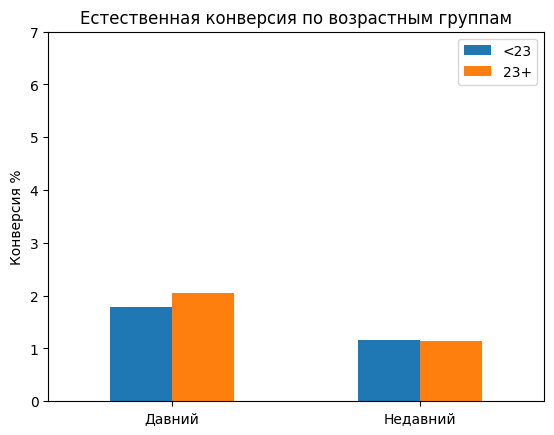

In [83]:
not_participant = df_2[(df_2['A'] != 1) & (df['B']!=1)]



not_part_22_old = not_participant[(not_participant['AgeGroup'] == '<23')&(not_participant['ClientSince'] == 2023)]
not_part_23_old = not_participant[(not_participant['AgeGroup'] == '23+')&(not_participant['ClientSince'] == 2023)]
not_part_22_new = not_participant[(not_participant['AgeGroup'] == '<23')&(not_participant['ClientSince'] == 2024)]
not_part_23_new = not_participant[(not_participant['AgeGroup'] == '23+')&(not_participant['ClientSince'] == 2024)]


nat_conv_new_sm23 = not_part_22_new['Purchased'].sum()/len(not_part_22_new['Purchased'])
nat_conv_new_b23 = not_part_23_new['Purchased'].sum()/len(not_part_23_new['Purchased'])

nat_conv_old_sm23= not_part_22_old['Purchased'].sum()/len(not_part_22_old['Purchased'])
nat_conv_old_b23 = not_part_23_old['Purchased'].sum()/len(not_part_23_old['Purchased'])

nat_conv_old_b23 = df_2[(df_2['group']=='Контрольная группа')&(df_2['Exp']=='Давний')&(df_2['AgeGroup']=='23+')]['Purchased'].sum()/len(df_2['Age'])
nat_conv_old_sm23 = df_2[(df_2['group']=='Контрольная группа')&(df_2['Exp']=='Давний')&(df_2['AgeGroup']=='<23')]['Purchased'].sum()/len(df_2['Age'])

nat_conv_new_b23 = df_2[(df_2['group']=='Контрольная группа')&(df_2['Exp']=='Недавний')&(df_2['AgeGroup']=='23+')]['Purchased'].sum()/len(df_2['Age'])
nat_conv_new_sm23 = df_2[(df_2['group']=='Контрольная группа')&(df_2['Exp']=='Недавний')&(df_2['AgeGroup']=='<23')]['Purchased'].sum()/len(df_2['Age'])

natural_conv_4groups = {
    '<23': [nat_conv_old_sm23*100, nat_conv_new_sm23*100],
    '23+': [nat_conv_old_b23*100, nat_conv_new_b23*100]
}
row_names = ['Давний', 'Недавний']

# Create a DataFrame from the dictionary and set the row names
nat_conv_OlNe = pd.DataFrame(natural_conv_4groups, index=row_names)

nat_conv_OlNe.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylim(0,7)
plt.ylabel('Конверсия %')
plt.title('Естественная конверсия по возрастным группам')
plt.show()

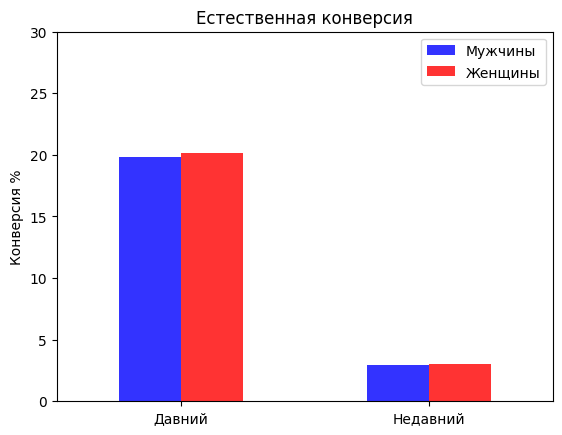

In [86]:

not_part_male_old = not_participant[(not_participant['Gender'] == 'Male')&(not_participant['ClientSince'] == 2023)]
not_part_female_old = not_participant[(not_participant['Gender'] == 'Female')&(not_participant['ClientSince'] == 2023)]
not_part_male_new = not_participant[(not_participant['Gender'] == 'Male')&(not_participant['ClientSince'] == 2024)]
not_part_female_new = not_participant[(not_participant['Gender'] == 'Female')&(not_participant['ClientSince'] == 2024)]


nat_conv_new_male = not_part_male_new['Purchased'].sum()/len(not_part_male_new['Purchased'])
nat_conv_new_female = not_part_female_new['Purchased'].sum()/len(not_part_female_new['Purchased'])

nat_conv_old_male = not_part_male_old['Purchased'].sum()/len(not_part_male_old['Purchased'])
nat_conv_old_female = not_part_female_old['Purchased'].sum()/len(not_part_female_old['Purchased'])


natural_conv_4groups = {
    'Мужчины': [nat_conv_old_male*100, nat_conv_new_male*100],
    'Женщины': [nat_conv_old_female*100, nat_conv_new_female*100]
}

nat_conv_MF = pd.DataFrame(natural_conv_4groups, index=row_names)
nat_conv_MF.plot(kind='bar',color =['blue','red'],alpha=0.8)
plt.ylim(0,30)
plt.xticks(rotation=0)
plt.ylabel('Конверсия %')
plt.title('Естественная конверсия')
plt.show()

####Группы А

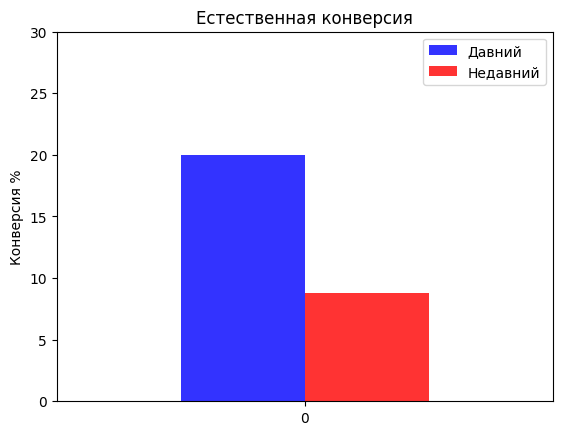

In [88]:
group_A = df_2[df_2['A']==1]
group_B = df_2[df_2['B']==1]

group_A_new = group_A[group_A['ClientSince']==2024]
group_A_old = group_A[group_A['ClientSince']==2023]

conv_group_A_old = group_A_old['Purchased'].sum()/len(group_A_old)
conv_group_A_new = group_A_new['Purchased'].sum()/len(group_A_new)

conv_type_A = {
    'Давний': [conv_group_A_old*100],
    'Недавний': [conv_group_A_new*100]
}

conv_type_A = pd.DataFrame(conv_type_A)
conv_type_A.plot(kind='bar',color =['blue','red'],alpha=0.8)
plt.ylim(0,30)
plt.xticks(rotation=0)
plt.ylabel('Конверсия %')
plt.title('Естественная конверсия')
plt.show()

###**Прогноз РК**


####**Конверсии**

#####***Давние/Недавние***

######*Группа А*

In [22]:
#Конверсия давние/недавние в группе А

group_A = df_2[df_2['A']==1]
group_B = df_2[df_2['B']==1]

group_A_new = group_A[group_A['ClientSince']==2024]
group_A_old = group_A[group_A['ClientSince']==2023]

conv_group_A_old = group_A_old['Purchased'].sum()/len(group_A_old)
conv_group_A_new = group_A_new['Purchased'].sum()/len(group_A_new)




print(f'Конверсия среди давних клиентов в группе А: {conv_group_A_old}')
print(f'Конверсия среди недавних клиентов в группе А: {conv_group_A_new}')



Конверсия среди давних клиентов в группе А: 0.2
Конверсия среди недавних клиентов в группе А: 0.0875


######*Группа В*

In [35]:

group_B_new = group_B[group_B['ClientSince']==2024]
group_B_old = group_B[group_B['ClientSince']==2023]

conv_group_B_old = group_B_old['Purchased'].sum()/len(group_B_old)
conv_group_B_new = group_B_new['Purchased'].sum()/len(group_B_new)




print(f'Конверсия среди недавних клиентов в группе B: {conv_group_B_old}')
print(f'Конверсия среди давних клиентов в группе B: {conv_group_B_new}')


Конверсия среди недавних клиентов в группе B: 0.2
Конверсия среди давних клиентов в группе B: 0.03


######*Естественная конверсия*

In [72]:
#Естественная конверсия давние/недавние
nat_conv_old = not_participant[not_participant['ClientSince']==2023]['Purchased'].sum()/len(not_participant[not_participant['ClientSince']==2023])
nat_conv_new = not_participant[not_participant['ClientSince']==2024]['Purchased'].sum()/len(not_participant[not_participant['ClientSince']==2024])

print(f'Естественная конверсия среди давних клиентов: {nat_conv_old}')
print(f'Естественная конверсия среди новых клиентов: {nat_conv_new}')

Естественная конверсия среди давних клиентов: 0.2
Естественная конверсия среди новых клиентов: 0.029947916666666668


#####***Мужчины/Женщины***

######*Группа А*

In [14]:
#Конверсия в половых категориях группы А

conv_group_A_new_male = group_A_new[group_A_new['Gender']=='Male']['Purchased'].sum()/len(group_A_new[group_A_new['Gender']=='Male'])
conv_group_A_new_fem = group_A_new[group_A_new['Gender']=='Female']['Purchased'].sum()/len(group_A_new[group_A_new['Gender']=='Female'])

conv_group_A_old_male = group_A_old[group_A_old['Gender']=='Male']['Purchased'].sum()/len(group_A_old[group_A_old['Gender']=='Male'])
conv_group_A_old_fem = group_A_old[group_A_old['Gender']=='Female']['Purchased'].sum()/len(group_A_old[group_A_old['Gender']=='Female'])


print('Недавние')
print(f'Конверсия среди клиентов мужчин в группе А: {conv_group_A_new_male}')
print(f'Конверсия среди клиентов женщин в группе А: {conv_group_A_new_fem}')
print('Давние')
print(f'Конверсия среди недавних клиентов мужчин в группе А: {conv_group_A_old_male}')
print(f'Конверсия среди давних клиентов женщин в группе А: {conv_group_A_old_fem}')

Недавние
Конверсия среди клиентов мужчин в группе А: 0.06153846153846154
Конверсия среди клиентов женщин в группе А: 0.11818181818181818
Давние
Конверсия среди недавних клиентов мужчин в группе А: 0.2
Конверсия среди давних клиентов женщин в группе А: 0.2


######*Группа В*

In [89]:
conv_group_B_new_male = group_B_new[group_B_new['Gender']=='Male']['Purchased'].sum()/len(group_B_new[group_B_new['Gender']=='Male'])
conv_group_B_new_fem = group_B_new[group_B_new['Gender']=='Female']['Purchased'].sum()/len(group_B_new[group_B_new['Gender']=='Female'])

conv_group_B_old_male = group_B_old[group_B_old['Gender']=='Male']['Purchased'].sum()/len(group_B_old[group_B_old['Gender']=='Male'])
conv_group_B_old_fem = group_B_old[group_B_old['Gender']=='Female']['Purchased'].sum()/len(group_B_old[group_B_old['Gender']=='Female'])


print('Недавние')
print(f'Конверсия среди клиентов мужчин в группе В: {conv_group_B_new_male}')
print(f'Конверсия среди клиентов женщин в группе В: {conv_group_B_new_fem}')
print('Давние')
print(f'Конверсия среди клиентов мужчин в группе В: {conv_group_B_old_male}')
print(f'Конверсия среди клиентов женщин в группе В: {conv_group_B_old_fem}')

Недавние
Конверсия среди клиентов мужчин в группе В: 0.021052631578947368
Конверсия среди клиентов женщин в группе В: 0.0380952380952381
Давние
Конверсия среди клиентов мужчин в группе В: 0.21084337349397592
Конверсия среди клиентов женщин в группе В: 0.1865671641791045


######*Естественная конверсия*

In [90]:
#Естественная конверсия среди мужчин и женщин(давние/недавние)

not_part_male_old = not_participant[(not_participant['Gender'] == 'Male')&(not_participant['ClientSince'] == 2023)]
not_part_female_old = not_participant[(not_participant['Gender'] == 'Female')&(not_participant['ClientSince'] == 2023)]
not_part_male_new = not_participant[(not_participant['Gender'] == 'Male')&(not_participant['ClientSince'] == 2024)]
not_part_female_new = not_participant[(not_participant['Gender'] == 'Female')&(not_participant['ClientSince'] == 2024)]


nat_conv_new_male = not_part_male_new['Purchased'].sum()/len(not_part_male_new['Purchased'])
nat_conv_new_fem = not_part_female_new['Purchased'].sum()/len(not_part_female_new['Purchased'])

nat_conv_old_male = not_part_male_old['Purchased'].sum()/len(not_part_male_old['Purchased'])
nat_conv_old_fem = not_part_female_old['Purchased'].sum()/len(not_part_female_old['Purchased'])

print('Недавние')
print(f'Конверсия среди недавних клиентов мужчин в : {nat_conv_new_male}')
print(f'Конверсия среди недавних клиентов женщин в : {nat_conv_new_fem}')
print('Давние')
print(f'Конверсия среди давних клиентов мужчин : {nat_conv_old_male}')
print(f'Конверсия среди давних клиентов женщин : {nat_conv_old_fem}')

Недавние
Конверсия среди недавних клиентов мужчин в : 0.029248091109097967
Конверсия среди недавних клиентов женщин в : 0.030656360539761562
Давние
Конверсия среди давних клиентов мужчин : 0.1981753674607197
Конверсия среди давних клиентов женщин : 0.20192822710230315


#####***По возрасту***

######Группа А

In [91]:
#Конверсия в группе А по возрасту(давний\недавний)

conv_group_A_new_23 = group_A_new[group_A_new['AgeGroup']=='23+']['Purchased'].sum()/len(group_A_new[group_A_new['AgeGroup']=='23+'])
conv_group_A_new_22 = group_A_new[group_A_new['AgeGroup']=='<23']['Purchased'].sum()/len(group_A_new[group_A_new['AgeGroup']=='<23'])

conv_group_A_old_23 = group_A_old[group_A_old['AgeGroup']=='23+']['Purchased'].sum()/len(group_A_old[group_A_old['AgeGroup']=='23+'])
conv_group_A_old_22 = group_A_old[group_A_old['AgeGroup']=='<23']['Purchased'].sum()/len(group_A_old[group_A_old['AgeGroup']=='<23'])


print('Недавние')
print(f'Конверсия клиентов младше 23 в группе А: {conv_group_A_new_22}')
print(f'Конверсия клиентов старше 23 в группе А: {conv_group_A_new_23}')
print('Давние')
print(f'Конверсия клиентов младше 23 в группе А: {conv_group_A_old_22}')
print(f'Конверсия клиентов старше 23 в группе А: {conv_group_A_old_23}')

Недавние
Конверсия клиентов младше 23 в группе А: 0.07079646017699115
Конверсия клиентов старше 23 в группе А: 0.10236220472440945
Давние
Конверсия клиентов младше 23 в группе А: 0.17857142857142858
Конверсия клиентов старше 23 в группе А: 0.21875


######Группа В

In [92]:

conv_group_B_new_23 = group_B_new[group_B_new['AgeGroup']=='23+']['Purchased'].sum()/len(group_B_new[group_B_new['AgeGroup']=='23+'])
conv_group_B_new_22 = group_B_new[group_B_new['AgeGroup']=='<23']['Purchased'].sum()/len(group_B_new[group_B_new['AgeGroup']=='<23'])

conv_group_B_old_23 = group_B_old[group_B_old['AgeGroup']=='23+']['Purchased'].sum()/len(group_B_old[group_B_old['AgeGroup']=='23+'])
conv_group_B_old_22 = group_B_old[group_B_old['AgeGroup']=='<23']['Purchased'].sum()/len(group_B_old[group_B_old['AgeGroup']=='<23'])


print('Недавние')
print(f'Конверсия среди клиентов младше 23 в группе В: {conv_group_B_new_22}')
print(f'Конверсия среди клиентов старше 23 в группе В: {conv_group_B_new_23}')
print('Давние')
print(f'Конверсия среди клиентов младше 23 в группе В: {conv_group_B_old_22}')
print(f'Конверсия среди клиентов старше 23 в группе В: {conv_group_B_old_23}')

Недавние
Конверсия среди клиентов младше 23 в группе В: 0.036585365853658534
Конверсия среди клиентов старше 23 в группе В: 0.025423728813559324
Давние
Конверсия среди клиентов младше 23 в группе В: 0.20714285714285716
Конверсия среди клиентов старше 23 в группе В: 0.19375


######Естественная конверсия

In [77]:
not_participant = df_2[(df_2['A'] != 1) & (df['B']!=1)]



not_part_22_old = not_participant[(not_participant['AgeGroup'] == '<23')&(not_participant['ClientSince'] == 2023)]
not_part_23_old = not_participant[(not_participant['AgeGroup'] == '23+')&(not_participant['ClientSince'] == 2023)]
not_part_22_new = not_participant[(not_participant['AgeGroup'] == '<23')&(not_participant['ClientSince'] == 2024)]
not_part_23_new = not_participant[(not_participant['AgeGroup'] == '23+')&(not_participant['ClientSince'] == 2024)]


nat_conv_new_22 = not_part_22_new['Purchased'].sum()/len(not_part_22_new['Purchased'])
nat_conv_new_23 = not_part_23_new['Purchased'].sum()/len(not_part_23_new['Purchased'])

nat_conv_old_22 = not_part_22_old['Purchased'].sum()/len(not_part_22_old['Purchased'])
nat_conv_old_23 = not_part_23_old['Purchased'].sum()/len(not_part_23_old['Purchased'])

print('Недавние')
print(f'Естественная конверсия в категории младше 23: {nat_conv_new_22}')
print(f'Естественная конверсия в категории старше 23: {nat_conv_new_23}')
print('Давние')
print(f'Естественная конверсия в категории младше 23: {nat_conv_old_22}')
print(f'Естественная конверсия в категории старше 23: {nat_conv_old_23}')

Недавние
Естественная конверсия в категории младше 23: 0.03224909646927995
Естественная конверсия в категории старше 23: 0.027920646583394562
Давние
Естественная конверсия в категории младше 23: 0.20271800679501698
Естественная конверсия в категории старше 23: 0.19768563162970107


####**Прибыль**


#####***Группа А***

######*Давние/Недавние*

In [24]:
print('Недавние')
print(f'Дополнительных покупок: { int((0.0875-0.0299)*len(not_participant))}')
print(f'Доход от покупок: { int((0.0875-0.0299)*len(not_participant))*3000}')
print(f'Расходы: { int((0.0875-0.0299)*len(not_participant))*80}')
print(f'Прибыль: { int((0.0875-0.0299)*len(not_participant))*(3000-80)}')

print('Давние')
print(f'Дополнительных покупок: 0')
print(f'Доход от покупок: 0')
print(f'Расход: 0')
print(f'Прибыль: 0')


Недавние
Дополнительных покупок: 1105
Доход от покупок: 3315000
Расходы: 88400
Прибыль: 3226600
Давние
Дополнительных покупок: 0
Доход от покупок: 0
Расход: 0
Прибыль: 0


######*Мужчины/Женщины(давние/недавние)*

In [26]:
print('Недавние клиенты мужчины')
print(f'Дополнительных покупок: { int((0.0615- 0.0292)*len(not_participant))}')
print(f'Доход от покупок: { int((0.0615- 0.0292)*len(not_participant))*3000}')
print(f'Расходы: { int((0.0615- 0.0292)*len(not_participant))*80}')
print(f'Прибыль: { int((0.0615- 0.0292)*len(not_participant))*(3000-80)}')


Недавние клиенты мужчины
Дополнительных покупок: 620
Доход от покупок: 1860000
Расходы: 49600
Прибыль: 1810400


In [27]:
print('Давние клиенты мужчины')
print(f'Дополнительных покупок: { int((0.2- 0.198)*len(not_participant))}')
print(f'Доход от покупок: { int((0.2- 0.198)*len(not_participant))*3000}')
print(f'Расходы: { int((0.2- 0.198)*len(not_participant))*80}')
print(f'Прибыль: { int((0.2- 0.198)*len(not_participant))*(3000-80)}')

Давние клиенты мужчины
Дополнительных покупок: 38
Доход от покупок: 114000
Расходы: 3040
Прибыль: 110960


In [29]:
print('Недавние клиенты женщины')
print(f'Дополнительных покупок: { int((0.1181- 0.0306)*len(not_participant))}')
print(f'Доход от покупок: { int((0.1181- 0.0306)*len(not_participant))*3000}')
print(f'Расходы: { int((0.1181- 0.0306)*len(not_participant))*80}')
print(f'Прибыль: { int((0.1181- 0.0306)*len(not_participant))*(3000-80)}')

Недавние клиенты женщины
Дополнительных покупок: 1680
Доход от покупок: 5040000
Расходы: 134400
Прибыль: 4905600


In [44]:
print('Давние клиенты женщины')
print(f'Дополнительных покупок: отрицательно')
print(f'Доход от покупок: отрицательно')
print(f'Расходы: отрицательно')
print(f'Прибыль: отрицательно')

Давние клиенты женщины
Дополнительных покупок: отрицательно
Доход от покупок: отрицательно
Расходы: отрицательно
Прибыль: отрицательно


######*до/после 23(давние/недавние)*

In [30]:
print('Недавние клиенты младше 23')
print(f'Дополнительных покупок: { int((0.07079- 0.03224)*len(not_participant))}')
print(f'Доход от покупок: { int((0.07079- 0.03224)*len(not_participant))*3000}')
print(f'Расходы: { int((0.07079- 0.03224)*len(not_participant))*80}')
print(f'Прибыль: { int((0.07079- 0.03224)*len(not_participant))*(3000-80)}')

Недавние клиенты младше 23
Дополнительных покупок: 740
Доход от покупок: 2220000
Расходы: 59200
Прибыль: 2160800


In [32]:
print('Недавние клиенты старше 23')
print(f'Дополнительных покупок: { int((0.10236-0.02792)*len(not_participant))}')
print(f'Доход от покупок: { int((0.10236-0.02792)*len(not_participant))*3000}')
print(f'Расходы: { int((0.10236-0.02792)*len(not_participant))*80}')
print(f'Прибыль: { int((0.10236-0.02792)*len(not_participant))*(3000-80)}')

Недавние клиенты старше 23
Дополнительных покупок: 1429
Доход от покупок: 4287000
Расходы: 114320
Прибыль: 4172680


In [78]:
print('Давние клиенты младше 23')
print(f'Дополнительных покупок: отрицательно')
print(f'Доход от покупок: отрицательно')
print(f'Расходы: отрицательно')
print(f'Прибыль: отрицательно')

Давние клиенты младше 23
Дополнительных покупок: отрицательно
Доход от покупок: отрицательно
Расходы: отрицательно
Прибыль: отрицательно


In [79]:
print('Давние клиенты старше 23')
print(f'Дополнительных покупок: { int((0.21875-0.19768)*len(not_participant))}')
print(f'Доход от покупок: { int((0.21875-0.19768)*len(not_participant))*3000}')
print(f'Расходы: { int((0.21875-0.19768)*len(not_participant))*80}')
print(f'Прибыль: { int((0.21875-0.19768)*len(not_participant))*(3000-80)}')

Давние клиенты старше 23
Дополнительных покупок: 404
Доход от покупок: 1212000
Расходы: 32320
Прибыль: 1179680


#####***Группа В***

######*Недавние/Давние*

In [93]:
print('Недавние')
print(f'Дополнительных покупок: 0')
print(f'Доход от покупок: 0')
print(f'Расход: 0')
print(f'Прибыль: 0\n')



print('Давние')
print(f'Дополнительных покупок: { int((0.03-0.029)*len(not_participant))}')
print(f'Доход от покупок: { int((0.03-0.029)*len(not_participant))*3000}')
print(f'Расходы: { int((0.03-0.029)*len(not_participant))*80}')
print(f'Прибыль: { int((0.03-0.029)*len(not_participant))*(3000-80)}')



Недавние
Дополнительных покупок: 0
Доход от покупок: 0
Расход: 0
Прибыль: 0

Давние
Дополнительных покупок: 19
Доход от покупок: 57000
Расходы: 1520
Прибыль: 55480


######*Мужчины/Женщины(давние/недавние)*

In [42]:
print('Недавние клиенты мужчины')
print(f'Дополнительных покупок: отрицательно')
print(f'Доход от покупок: отрицательно')
print(f'Расходы: отрицательно')
print(f'Прибыль: отрицательно')

Недавние клиенты мужчины
Дополнительных покупок: отрицательно
Доход от покупок: отрицательно
Расходы: отрицательно
Прибыль: отрицательно


In [41]:
print('Давние клиенты мужчины')
print(f'Дополнительных покупок: { int((0.2108- 0.1981)*len(not_participant))}')
print(f'Доход от покупок: { int((0.2108- 0.1981)*len(not_participant))*3000}')
print(f'Расходы: { int((0.2108- 0.1981)*len(not_participant))*80}')
print(f'Прибыль: { int((0.2108- 0.1981)*len(not_participant))*(3000-80)}')

Давние клиенты мужчины
Дополнительных покупок: 243
Доход от покупок: 729000
Расходы: 19440
Прибыль: 709560


In [43]:
print('Недавние клиенты женщины')
print(f'Дополнительных покупок: { int((0.03809- 0.0306)*len(not_participant))}')
print(f'Доход от покупок: { int((0.03809- 0.0306)*len(not_participant))*3000}')
print(f'Расходы: { int((0.03809- 0.0306)*len(not_participant))*80}')
print(f'Прибыль: { int((0.03809- 0.0306)*len(not_participant))*(3000-80)}')

Недавние клиенты женщины
Дополнительных покупок: 143
Доход от покупок: 429000
Расходы: 11440
Прибыль: 417560


In [45]:
print('Давние клиенты женщины')
print(f'Дополнительных покупок: отрицательно')
print(f'Доход от покупок: отрицательно')
print(f'Расходы: отрицательно')
print(f'Прибыль: отрицательно')

Давние клиенты женщины
Дополнительных покупок: отрицательно
Доход от покупок: отрицательно
Расходы: отрицательно
Прибыль: отрицательно


######*до/после 23(давние/недавние)*

In [47]:
print('Недавние клиенты младше 23')
print(f'Дополнительных покупок: { int((0.0365- 0.03224)*len(not_participant))}')
print(f'Доход от покупок: { int((0.0365- 0.03224)*len(not_participant))*3000}')
print(f'Расходы: { int((0.0365- 0.03224)*len(not_participant))*80}')
print(f'Прибыль: { int((0.0365- 0.03224)*len(not_participant))*(3000-80)}')

Недавние клиенты младше 23
Дополнительных покупок: 81
Доход от покупок: 243000
Расходы: 6480
Прибыль: 236520


In [48]:
print('Недавние клиенты старше 23')
print(f'Дополнительных покупок: отрицательно')
print(f'Доход от покупок: отрицательно')
print(f'Расходы: отрицательно')
print(f'Прибыль: отрицательно')

Недавние клиенты старше 23
Дополнительных покупок: отрицательно
Доход от покупок: отрицательно
Расходы: отрицательно
Прибыль: отрицательно


In [80]:
print('Давние клиенты младше 23')
print(f'Дополнительных покупок: { int((0.20714-0.2027)*len(not_participant))}')
print(f'Доход от покупок: { int((0.20714-0.2027)*len(not_participant))*3000}')
print(f'Расходы: { int((0.20714-0.2027)*len(not_participant))*80}')
print(f'Прибыль: { int((0.20714-0.2027)*len(not_participant))*(3000-80)}')

Давние клиенты младше 23
Дополнительных покупок: 85
Доход от покупок: 255000
Расходы: 6800
Прибыль: 248200


In [50]:
print('Давние клиенты старше 23')
print(f'Дополнительных покупок: отрицательно')
print(f'Доход от покупок: отрицательно')
print(f'Расходы: отрицательно')
print(f'Прибыль: отрицательно')

Давние клиенты старше 23
Дополнительных покупок: отрицательно
Доход от покупок: отрицательно
Расходы: отрицательно
Прибыль: отрицательно
